In [1]:
! pip install matplotlib opencv-python spicy

In [2]:
! pip install split-folders tensorflow

In [3]:
import splitfolders
import os
path = "/home/deeplearner/dataset_node7/231226_lp_kor/"
print(os.listdir(path))

['g', 'e', 'w', 'y']


In [4]:
# splitfolders.ratio(path, output="Split-lpr", ratio=(0.8, 0.1, 0.1))

In [5]:
! pwd

/home/deeplearner/ai-vn/projects


In [6]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers

2024-01-09 00:43:23.884004: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-09 00:43:23.905953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 00:43:23.905972: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-09 00:43:23.906926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-09 00:43:23.911253: I tensorflow/core/platform/cpu_feature_guar

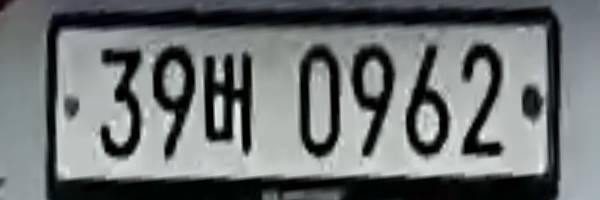

In [7]:
img_w = image.load_img('/home/deeplearner/ai-vn/projects/231226_lp_kor/w/220401T103719.693.png')
img_w

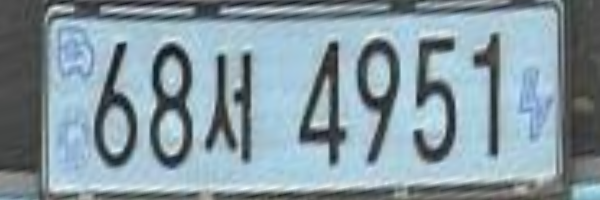

In [8]:
img_e = image.load_img('/home/deeplearner/ai-vn/projects/231226_lp_kor/e/220401T145550.557.png')
img_e

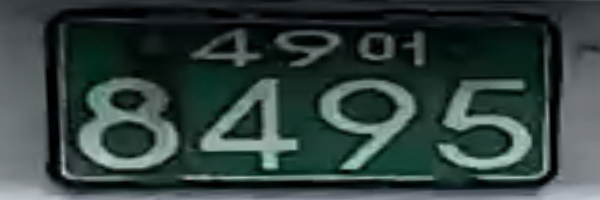

In [9]:
img_g = image.load_img('/home/deeplearner/ai-vn/projects/231226_lp_kor/g/220401T103855.590.png')
img_g

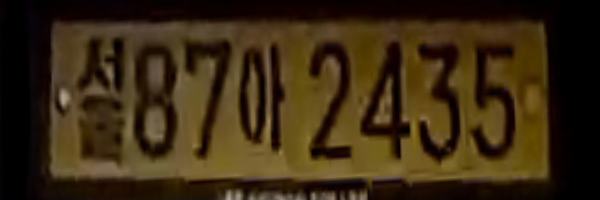

In [10]:
img_y = image.load_img('/home/deeplearner/ai-vn/projects/231226_lp_kor/y/220401T103829.199.png')
img_y

In [11]:
# # os.listdir(custom_dataset)
# sample = custom_dataset[14000]
# image, label = sample
# print(label)

In [12]:
# x = os.listdir('/home/deeplearner/ai-vn/projects/Split-lpr/train/w/')
# len(x)

In [13]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Convert the PyTorch tensor back to a NumPy array for visualization
# image_np = np.transpose(image.numpy(), (1, 2, 0))
# image_np = 0.5 * image_np + 0.5  # Denormalize

# # Display the image and label
# plt.imshow(image_np)
# plt.title(f"Label: {custom_dataset.classes[label]}")  # Convert label index to class name
# plt.show()

In [14]:
datagen = ImageDataGenerator(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
def img_for_augmentation(img_path: str):
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    return x

def data_augmentation(x, step: int, save_to_dir, save_format):
    i = 0
    for batch in datagen.flow(x, batch_size = 1, save_to_dir=save_to_dir, save_format=save_format):
        i += 1
        if i >= step:
            break

path = ['./Split-lpr/train/e/', './Split-lpr/train/g/', './Split-lpr/train/w/', './Split-lpr/train/y/']

def img_path_list(path: str):
    img_list = os.listdir(path)
    img_path_list = []
    for img in img_list:
        img_path_list.append(path + img)
    return img_path_list
e_path_list = img_path_list('./Split-lpr/train/e/')
g_path_list = img_path_list('./Split-lpr/train/g/')
w_path_list = img_path_list('./Split-lpr/train/w/')
y_path_list = img_path_list('./Split-lpr/train/y/')

In [16]:
len_check = [len(e_path_list), len(g_path_list), len(w_path_list), len(y_path_list)]
len_check

[1576, 1786, 13263, 1957]

In [17]:
# for e in e_path_list:
#     x = img_for_augmentation(e)
#     data_augmentation(x, step= 2, save_to_dir='./Split-lpr/train/e/', save_format='png')


In [18]:
len(os.listdir('./Split-lpr/train/e'))


1576

In [19]:
# for g in g_path_list:
#     x = img_for_augmentation(g)
#     data_augmentation(x, step= 3, save_to_dir='./Split-lpr/train/g/', save_format='png')

In [20]:
len(os.listdir('./Split-lpr/train/g'))

1786

In [21]:
# for y in y_path_list:
#     x = img_for_augmentation(y)
#     data_augmentation(x, step= 2, save_to_dir='./Split-lpr/train/y', save_format='png')

In [22]:
len(os.listdir('./Split-lpr/train/g'))

1786

In [23]:
len_check = [len(os.listdir('./Split-lpr/train/g')), len(os.listdir('./Split-lpr/train/e')), len(os.listdir('./Split-lpr/train/w')), len(os.listdir('./Split-lpr/train/y'))]
len_check

[1786, 1576, 13263, 1957]

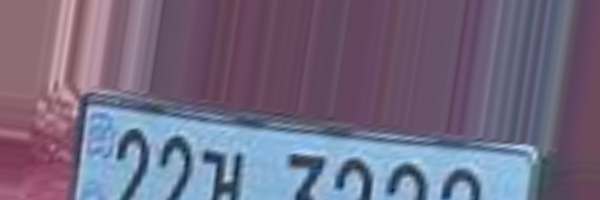

In [24]:
# check augmentation by hand
img_y = image.load_img('./Split-lpr/train/e/_0_2572.png')
img_y

In [25]:
class_names = ['g', 'e', 'w', 'y']

In [26]:
# training data
train_generator = datagen.flow_from_directory(
    directory="/home/deeplearner/ai-vn/projects/Split-lpr/train",
    classes = class_names,
    batch_size=32,
    target_size = (224,224),
    class_mode='binary',
)

Found 18582 images belonging to 4 classes.


In [27]:
test_generator = datagen.flow_from_directory(
    directory = "/home/deeplearner/ai-vn/projects/Split-lpr/test",
    classes = class_names,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Found 1829 images belonging to 4 classes.


In [28]:
valid_generator = datagen.flow_from_directory(
    directory = "/home/deeplearner/ai-vn/projects/Split-lpr/val",
    classes = class_names,
    target_size = (224,224),
    batch_size = 32,
    class_mode = "binary"
)

Found 1823 images belonging to 4 classes.


In [29]:
# img, label = test_generator.next()
# sample = test_generator[13]
# img, label = sample
# label

In [30]:
# def directory_generator(path: str, classes_name: list, batch_size: int):
#     Datagen = ImageDataGenerator()
#     generator = Datagen.flow_from_directory(directory = path, 
#     classes = classes_name,
#     batch_size=batch_size,
#     target_size = (224,224),
#     class_mode='binary')
#     return generator
   
# def label_of(generator, index: int):
#     sample = generator[index]
#     img, label = sample
#     return label

# label_of(test_generator, 13)

### Build the model
Resnet50 Architecture

In [31]:
resnet_50 = ResNet50(include_top=False, weights = 'imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

2024-01-09 00:43:25.005640: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-09 00:43:25.005886: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-09 00:43:25.035359: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [32]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAvgPool2D()(x)
x = layers.Dense(512, activation = 'relu',kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(4, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)


### Train the model

In [33]:
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs = epochs, batch_size=batch_size)

In [34]:
# launch the training
sgd_optimizer = SGD(learning_rate=0.001, momentum=0.09)
model_running = trainModel(model = model, epochs = 20, optimizer=sgd_optimizer)

Epoch 1/20


2024-01-09 00:43:27.648618: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-01-09 00:43:28.584868: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6e48a75a10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-09 00:43:28.584894: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-01-09 00:43:28.584901: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
I0000 00:00:1704728608.628795  682263 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


581/581 [==============================] - 99s 166ms/step - loss: 12.5459 - accuracy: 0.6087 - val_loss: 11.6214 - val_accuracy: 0.9122
Epoch 2/20
581/581 [==============================] - 97s 167ms/step - loss: 11.8927 - accuracy: 0.7207 - val_loss: 11.2151 - val_accuracy: 0.9386
Epoch 3/20
581/581 [==============================] - 96s 165ms/step - loss: 11.4936 - accuracy: 0.7503 - val_loss: 10.9019 - val_accuracy: 0.9731
Epoch 4/20
581/581 [==============================] - 96s 164ms/step - loss: 11.1385 - accuracy: 0.7846 - val_loss: 10.6127 - val_accuracy: 0.9737
Epoch 5/20
581/581 [==============================] - 96s 165ms/step - loss: 10.8238 - accuracy: 0.8051 - val_loss: 10.3362 - val_accuracy: 0.9748
Epoch 6/20
581/581 [==============================] - 97s 166ms/step - loss: 10.5134 - accuracy: 0.8295 - val_loss: 10.0559 - val_accuracy: 0.9759
Epoch 7/20
581/581 [==============================] - 95s 164ms/step - loss: 10.2286 - accuracy: 0.8418 - val_loss: 9.7944 - val_

In [35]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

58/58 [==============================] - 9s 148ms/step - loss: 6.9900 - accuracy: 0.9967
The test loss is:  6.989994525909424
The best accuracy is:  99.67195391654968


In [36]:
# test_label = os.listdir('/home/deeplearner/ai-vn/projects/Split-lpr/test/')
# print('/home/deeplearner/ai-vn/projects/Split-lpr/test/' + test_label[0])

In [37]:
path = '/home/deeplearner/ai-vn/projects/Split-lpr/test/e/'
check_list = os.listdir(path)
g = 0
e = 0
w = 0
y = 0
for i in check_list:
    img = tf.keras.preprocessing.image.load_img(path+i, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.array([img_array]) 
    predictions = model.predict(img_array)
    class_id = np.argmax(predictions, axis = 1)
    if class_id.item() == 0:
        g += 1
    elif class_id.item() == 1:
        e += 1
    elif class_id.item() == 2:
        w += 1
    elif class_id.item() == 3:
        y += 1
    print(class_names[class_id.item()])

print(e/(len(check_list)))

1/1 [==============================] - 0s 495ms/step
e
1/1 [==============================] - 0s 11ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 9ms/step
e
1/1 [==============================] - 0s 9ms/step
e
1/1 [==============================] - 0s 9ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 9ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 9ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 9ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [==============================] - 0s 10ms/step
e
1/1 [============================

In [38]:
# Prediction of test set
path_test = '/home/deeplearner/ai-vn/projects/Split-lpr/test/'
folder_test = [path_test + 'g/', path_test + 'e/',path_test + 'w/',path_test + 'y/']
test_pred = []
for folder in folder_test:
    check_list = os.listdir(folder)
    for i in check_list:
        img = tf.keras.preprocessing.image.load_img(folder+i, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.array([img_array]) 
        predictions = model.predict(img_array)
        class_id = np.argmax(predictions, axis = 1)
        test_pred.append(class_id.item())

1/1 [==============================] - 0s 10ms/step


1/1 [==============================] - 0s 9ms/step


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        60
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00      1659
           3       0.98      0.98      0.98        86

    accuracy                           1.00      1829
   macro avg       0.99      0.98      0.98      1829
weighted avg       1.00      1.00      1.00      1829



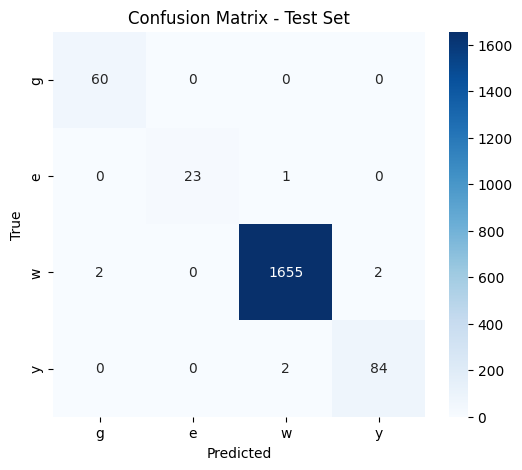

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# True label of test set
test_true = test_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(test_true, test_pred)
print(classification_report(test_true, test_pred))

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
# Prediction of validation set
path_val = '/home/deeplearner/ai-vn/projects/Split-lpr/val/'
folder_val = [path_val + 'g/', path_val + 'e/',path_val + 'w/',path_val + 'y/']
val_pred = []
for folder in folder_val:
    check_list = os.listdir(folder)
    for i in check_list:
        img = tf.keras.preprocessing.image.load_img(folder+i, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.array([img_array]) 
        predictions = model.predict(img_array)
        class_id = np.argmax(predictions, axis = 1)
        val_pred.append(class_id.item())

1/1 [==============================] - 0s 10ms/step


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       1.00      0.87      0.93        23
           2       0.99      1.00      1.00      1657
           3       0.99      0.94      0.96        85

    accuracy                           0.99      1823
   macro avg       0.99      0.95      0.97      1823
weighted avg       0.99      0.99      0.99      1823



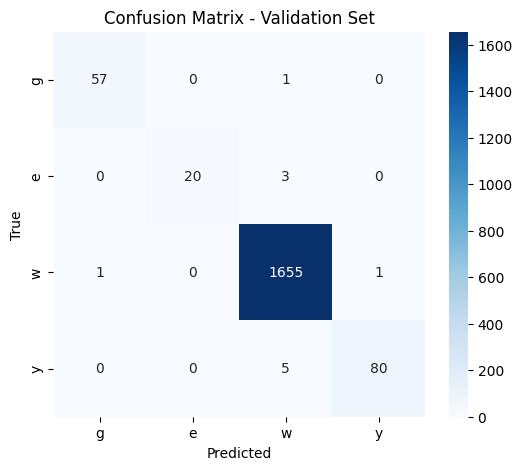

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# True label of Validation set
val_true = valid_generator.classes

# Confusion Matrix
conf_matrix = confusion_matrix(val_true, val_pred)
print(classification_report(val_true, val_pred))

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
len(os.listdir('/home/deeplearner/ai-vn/projects/Split-lpr/test/e'))+ len(os.listdir('/home/deeplearner/ai-vn/projects/Split-lpr/test/w'))+ len(os.listdir('/home/deeplearner/ai-vn/projects/Split-lpr/test/g'))+ len(os.listdir('/home/deeplearner/ai-vn/projects/Split-lpr/test/y'))

1829

In [43]:
len(test_pred)

1829

In [44]:
model.save('/home/deeplearner/ai-vn/projects/my_model')

INFO:tensorflow:Assets written to: /home/deeplearner/ai-vn/projects/my_model/assets


INFO:tensorflow:Assets written to: /home/deeplearner/ai-vn/projects/my_model/assets


In [45]:
# contains an assets folder, saved_model.pb, and variables folder
%ls /home/deeplearner/ai-vn/projects/my_model

assets/  fingerprint.pb  keras_metadata.pb  saved_model.pb  variables/


In [46]:
model = tf.keras.models.load_model('/home/deeplearner/ai-vn/projects/my_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [47]:
# len(os.listdir("/home/deeplearner/dataset_node7/231226_lp_kor/e/")) + len(os.listdir("/home/deeplearner/dataset_node7/231226_lp_kor/g")) + len(os.listdir("/home/deeplearner/dataset_node7/231226_lp_kor/w")) + len(os.listdir("/home/deeplearner/dataset_node7/231226_lp_kor/y"))